In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
log_filename = 'rl/logs/log-2024-07-12_17-56-33.csv'
# specify the column names in the comments in the header
df = pd.read_csv(log_filename, skiprows=1, names=['timestamp', 't', 'action', 'reward', 'new_Q_value', 'alpha', 'epsilon'])

df

,timestamp,t,action,reward,new_Q_value,alpha,epsilon


In [3]:
df_plot = df

df_plot.plot('t', ['reward', 'alpha', 'epsilon'])


TypeError: no numeric data to plot

: 

In [ ]:
df_plot = df.pivot(index='t', columns='action', values='new_Q_value')
df_plot

action,0,1,2,3,4,5,6
t,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,-7.778021
3,-6.791341,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,-7.209655,NaN
5,NaN,NaN,NaN,-7.206971,NaN,NaN,NaN
6,NaN,-5.877768,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
117,NaN,-5.588293,NaN,NaN,NaN,NaN,NaN
118,NaN,-5.586255,NaN,NaN,NaN,NaN,NaN
119,NaN,-5.584219,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_plot.describe()

action,0,1,2,3,4,5,6
count,5.000000,81.000000,15.000000,4.000000,8.000000,3.000000,4.000000
mean,-6.912000,-5.664443,-6.181475,-7.326813,-6.535303,-7.474533,-8.557959
std,0.067596,0.054190,0.014075,0.080571,0.037997,0.229406,0.629073
min,-6.948015,-5.877768,-6.194253,-7.374339,-6.585371,-7.609562,-9.207943
25%,-6.944240,-5.703577,-6.189997,-7.374020,-6.562417,-7.606973,-8.973190
50%,-6.940319,-5.662133,-6.184426,-7.362971,-6.538594,-7.604383,-8.622936
75%,-6.936084,-5.620991,-6.178003,-7.315764,-6.512321,-7.407019,-8.207706
max,-6.791341,-5.580148,-6.136710,-7.206971,-6.474478,-7.209655,-7.778021


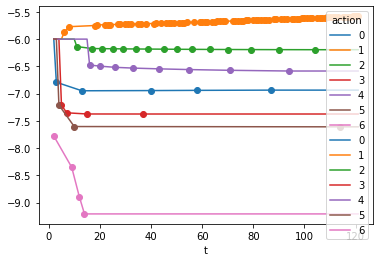

In [ ]:
df_plot = df.pivot(index='t', columns='action', values='new_Q_value')
ax = df_plot.plot(marker='o')  # This uses the default color cycle

colors = [line.get_color() for line in ax.get_lines()]

df_plot = df_plot.interpolate()
df_plot = df_plot.fillna(-6.0)

df_plot.plot(ax=ax, color=colors)

plt.show()